In [1]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 데이터 파일 불러오기

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [3]:
# 데이터 파일 확인

train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
# 결측치 확인

train[train['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
train[train['hour_bef_ozone'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [12]:
# 결측값 처리

train['hour_bef_ozone'].fillna(train['hour_bef_ozone'].mean(),inplace =True)
train['hour_bef_temperature'].fillna(train['hour_bef_temperature'].mean(),inplace =True)
train['hour_bef_windspeed'].fillna(train['hour_bef_windspeed'].mean(),inplace =True)
train['hour_bef_humidity'].fillna(train['hour_bef_humidity'].mean(),inplace =True)
train['hour_bef_visibility'].fillna(train['hour_bef_visibility'].mean(),inplace =True)
train['hour_bef_pm10'].fillna(train['hour_bef_pm10'].mean(),inplace =True)
train['hour_bef_pm2.5'].fillna(train['hour_bef_pm2.5'].mean(),inplace =True)
train['hour_bef_precipitation'].fillna(train['hour_bef_precipitation'].mode(),inplace =True)

In [22]:
test['hour_bef_ozone'].fillna(test['hour_bef_ozone'].mean(),inplace =True)
test['hour_bef_temperature'].fillna(test['hour_bef_temperature'].mean(),inplace =True)
test['hour_bef_windspeed'].fillna(test['hour_bef_windspeed'].mean(),inplace =True)
test['hour_bef_humidity'].fillna(test['hour_bef_humidity'].mean(),inplace =True)
test['hour_bef_visibility'].fillna(test['hour_bef_visibility'].mean(),inplace =True)
test['hour_bef_pm10'].fillna(test['hour_bef_pm10'].mean(),inplace =True)
test['hour_bef_pm2.5'].fillna(test['hour_bef_pm2.5'].mean(),inplace =True)
test['hour_bef_precipitation'].fillna(test['hour_bef_precipitation'].mode(),inplace =True)

In [51]:
train.iloc[934,3]=0
train.iloc[1035,3]=0

In [32]:
test.iloc[653,3]=0

In [17]:
# 특성별 상관계수 확인

corr = train.corr()
corr

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003343,-0.017944,0.008948,0.054001,-0.024834,0.003418,-0.002131
hour,-0.010901,1.000000,0.406797,0.021646,0.460624,-0.329200,0.176271,0.368945,-0.033855,-0.057212,0.626047
hour_bef_temperature,-0.000029,0.406797,1.000000,-0.097056,0.375223,-0.496088,0.197417,0.530267,-0.003727,-0.074866,0.618892
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022744,0.276481,-0.217155,-0.060405,-0.048440,0.004426,-0.163985
hour_bef_windspeed,-0.003343,0.460624,0.375223,0.022744,1.000000,-0.432773,0.251598,0.511100,0.009881,-0.191462,0.458624
hour_bef_humidity,-0.017944,-0.329200,-0.496088,0.276481,-0.432773,1.000000,-0.592244,-0.411417,-0.104700,0.159193,-0.470754
hour_bef_visibility,0.008948,0.176271,0.197417,-0.217155,0.251598,-0.592244,1.000000,0.098962,-0.389383,-0.612117,0.298847
hour_bef_ozone,0.054001,0.368945,0.530267,-0.060405,0.511100,-0.411417,0.098962,1.000000,0.111571,0.016893,0.468719
hour_bef_pm10,-0.024834,-0.033855,-0.003727,-0.048440,0.009881,-0.104700,-0.389383,0.111571,1.000000,0.474259,-0.110884
hour_bef_pm2.5,0.003418,-0.057212,-0.074866,0.004426,-0.191462,0.159193,-0.612117,0.016893,0.474259,1.000000,-0.129398


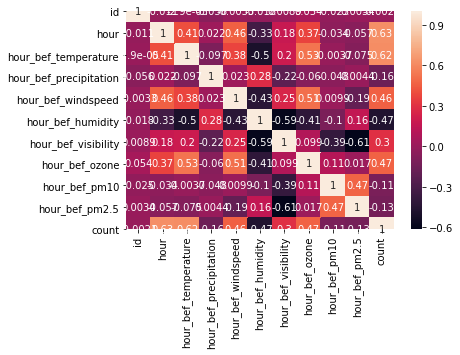

In [18]:
# 상관계수 시각화

sns.heatmap(corr, annot=True)

In [19]:
# count랑 상관관계 있는 특성: hour, temp, wind, humi, vis조금, ozone
# 습도 제거
# 2.5랑 10도 둘중 하나 선택

IndexError: index 3 is out of bounds for axis 0 with size 3

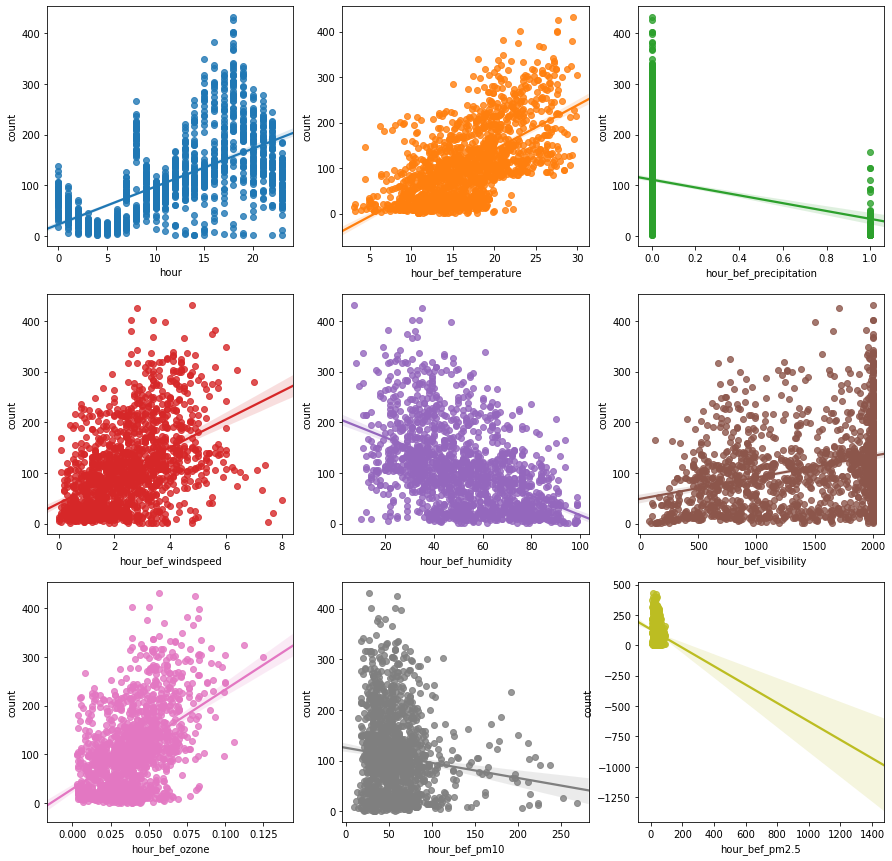

In [52]:
# features vs target 시각화

fig, axs = plt.subplots(figsize=(15,15), nrows =3, ncols=3)
x_features = train.columns.drop(['id'])

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='count', data=train, ax=axs[row][col])

In [94]:
#테스트 데이터 준비
X=train.drop(['count','id','hour_bef_humidity'],axis=1)
y= train['count']
X_test = test.drop(['id','hour_bef_humidity'],axis=1)

In [95]:
# 회귀 모델 생성
# Logistic Reg.

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
#평가 해보기

from sklearn.metrics import mean_squared_error, r2_score
y_trial = reg.predict(X)

mse = mean_squared_error(y, y_trial)
rmse = np.sqrt(mse)

r2 = r2_score(y, y_trial)

print("MSE: {0:.3f}. RMSE: {1:.3f}".format(mse,rmse))
print('R2; {0:.3f}'.format(r2))

MSE: 2738.784. RMSE: 52.333
R2; 0.599


In [97]:
#수정된 결정계수 확인

#데이터의 크기
n=len(X)

#독립변수 개수
k=len(X.columns)

#수정된 결정계수
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))

print('Adjusted R2: {:.4f}'.format(adj_r2))

Adjusted R2: 0.5964


In [ ]:
# SGD regressor 사용
from sklearn.linear_model import SGDRegressor

# 객체 생성
sgd_reg = SGDRegressor(max_iter =1000, eta0=0.01)

# 학습
sgd_reg.fit(X_train_scaled, y_train)

# 회귀 계수 및 절편
print(sgd_reg.coef_, sgd_reg.intercept_)

# 성능평가
y_train_pred = sgd_reg.predict(X_train_scaled)
y_test_pred = sgd_reg.predict(X_test_scaled)
evaluate_score(y_train, y_train_pred)
evaluate_score(y_test, y_test_pred)

In [98]:
# 제출 파일 생성

y_pred = reg.predict(X_test)

submission['count']=y_pred

submission.to_csv('./submission.csv', index=False)

### 최종 점수: RMSE 70.2291806433